# Musik Projekt

Data import

In [1]:
import numpy as np
import torch.nn as nn
from PIL import Image

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

Set random seed

In [63]:
import torch
import numpy as np
import random

# Set seed for PyTorch
torch.manual_seed(42)

# Set seed for NumPy
np.random.seed(42)

# Set seed for Python's random module
random.seed(42)

# If you are using CUDA
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)  # if you are using multi-GPU

# Ensure deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [44]:

# import the modules
import os
from os import listdir

print(os.getcwd())

# get the path/directory
folder_dir = "./images_original/blues"
for images in os.listdir(folder_dir):
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)



/Users/nicolasvogel/Dokumente/16_ZHAW_MSc/V5_6_NeuralNetworks&DeepLearning/NNDL_Project_Repo
blues00009.png
blues00035.png
blues00021.png
blues00020.png
blues00034.png
blues00008.png
blues00022.png
blues00036.png
blues00037.png
blues00023.png
blues00027.png
blues00033.png
blues00032.png
blues00026.png
blues00030.png
blues00024.png
blues00018.png
blues00019.png
blues00025.png
blues00031.png
blues00095.png
blues00081.png
blues00056.png
blues00042.png
blues00043.png
blues00057.png
blues00080.png
blues00094.png
blues00082.png
blues00096.png
blues00069.png
blues00041.png
blues00055.png
blues00054.png
blues00040.png
blues00068.png
blues00097.png
blues00083.png
blues00087.png
blues00093.png
blues00044.png
blues00050.png
blues00078.png
blues00079.png
blues00051.png
blues00045.png
blues00092.png
blues00086.png
blues00090.png
blues00084.png
blues00053.png
blues00047.png
blues00046.png
blues00052.png
blues00085.png
blues00091.png
blues00088.png
blues00077.png
blues00063.png
blues00062.png
blues00

In [21]:
import os
from PIL import Image

input_dir = "./images_original/blues"

# load images one after another - useful for images one by one
for image in os.listdir(input_dir):
    img = Image.open(os.path.join(input_dir, image))
    # do whatever you like to do with the img

# load all images data at in to list
image_list = [Image.open(os.path.join(input_dir, image)) for image in os.listdir(input_dir)]


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

input_dir = "./images_original/blues"

# Load images one after another - useful for images one by one
for image in os.listdir(input_dir):
    img = Image.open(os.path.join(input_dir, image))

    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Load all images data into a list
image_list = [Image.open(os.path.join(input_dir, image)) for image in os.listdir(input_dir)]

# Print all images in the list
for img in image_list:
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

Split the datafolder into test and training data (not equal across genres yet!) -> unbalanced

In [30]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader

# Data directory
data_dir = "./images_original"


# Load the dataset with original image size
dataset = ImageFolder(data_dir, transform=transforms.Compose([transforms.Resize((288, 432)), # Adjust to original image size
 transforms.ToTensor()]))

# Load the dataset
# dataset = ImageFolder(data_dir, transform=transforms.Compose([
#     transforms.Resize((150, 150)),
#     transforms.ToTensor()]))

# Define the split ratio
train_ratio = 0.8
test_ratio = 0.2

# Calculate the number of samples for training and testing
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

# Randomly split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders (load the train and validation into batches)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print the number of samples in each set
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")
print(train_dataset)

Dataset ImageFolder
    Number of datapoints: 999
    Root location: ./images_original
    StandardTransform
Transform: Compose(
               Resize(size=(288, 432), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Number of training samples: 799
Number of testing samples: 200


Look at first 5 images of training dataset (function proposed by microsoft copilot)

In [ ]:
import matplotlib.pyplot as plt

# Function to show an image
def show_image(img, title=None):
    img = img.permute(1, 2, 0)  # Change the order of dimensions
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Display a few images from the training dataset
for i in range(5):  # Change the range to display more or fewer images
    img, label = train_dataset[i]
    show_image(img, title=f"Label: {train_dataset.dataset.classes[label]}")
    



Recall tensor shape

torch.Size([3, 288, 432]) 0
torch.Size([3, 288, 432]) 2


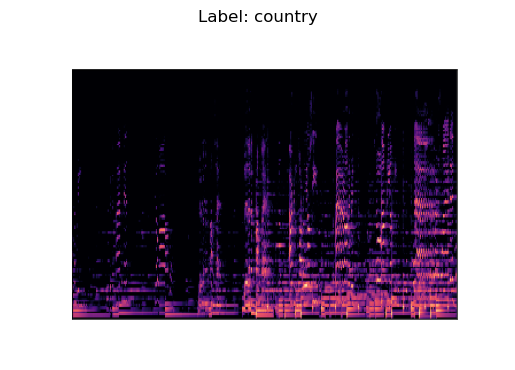

In [34]:
img, label = dataset[0]
print(img.shape, label)
img, label = train_dataset[0]
print(img.shape, label) # prints size of first image: 3 channels (RGB), height, width
show_image(img, title=f"Label: {train_dataset.dataset.classes[label]}")

#output :
#torch.Size([3, 288, 432]) 0 # has label 0 which represents genre blues,
#torch.Size([3, 288, 432]) 8 # first image of train ddset (8 = raggae)

See all 10 music genres (classes) of dataset

In [35]:
print("Follwing classes are there : \n",dataset.classes)

Follwing classes are there : 
 ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Different printing function based on tutorial (Medium article)

Label : blues


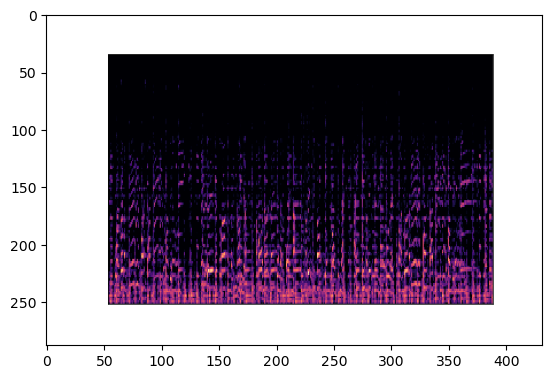

In [36]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

### Visualize training batch (batch size 32 see above)

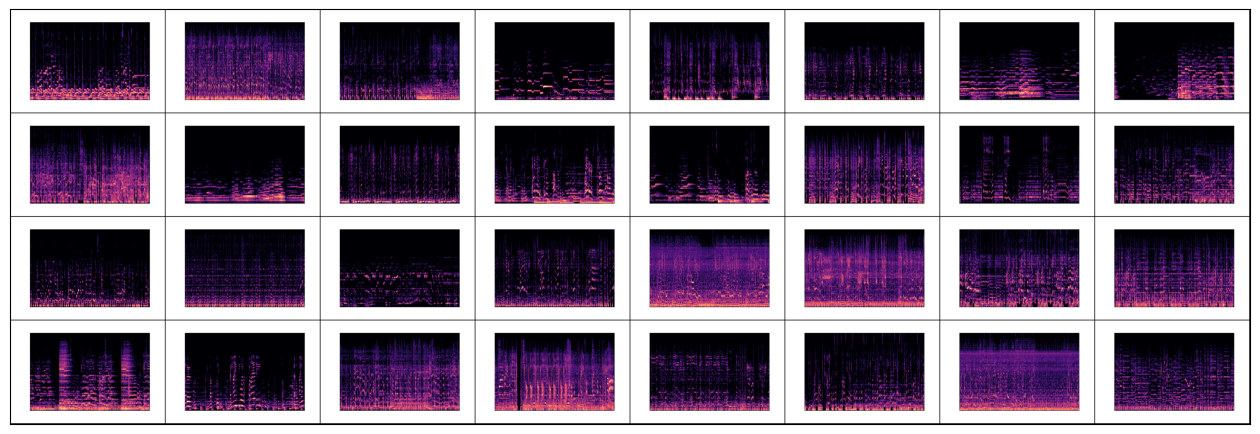

In [37]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break

show_batch(train_loader)

### Base Model for Image Classification

This base class is used to develop all neural networks. We add functionalities to the base to train the model, validate the model and get the result for each epoch. It's reusable and can be used for any image classification model, no need to rewrite this every time.

In [39]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)         # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()     # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'],result['val_loss'], result['val_acc']))

Concepts to refine the model: Convolution, Padding, Stride, Maxpooling

### CNN Model for Classification

Final model with 3 CNN blocks, each consisting of 2 convolutional layers & 1 max-pooling layer. Relu activation function is used to remove negative values from the feature map. Stride(1, 1), padding = 1.After applying convolution and feature extracting a flatten layer is used to flatten the tensor from 3 to 1 dimension. Then 3 linear layers are added to reduce the size of the tensor and learn the features.

In [40]:

class MusicGenreClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(497664,1024), # because our images are not 150x150 first number isnot 82944
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # we have 10 classes and not 6
        )

    def forward(self, xb):
        return self.network(xb)

### Hyperparameters, Model Training, And Evaluation:
Now we have to train the music genre classification model on the training dataset. That defines the fit, evaluation and accuracy methods.

In [41]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):

    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):§

        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [42]:
# Instantiate the model
model = MusicGenreClassification()

# Number of epochs
num_epochs = 30

# Optimizer
opt_func = torch.optim.Adam

# Learning rate
lr = 0.001

# fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_loader, test_loader, opt_func) # in online article they used val_loader (validation) instead of test_loader

Epoch [0], train_loss: 2.5396, val_loss: 2.3019, val_acc: 0.1116
Epoch [1], train_loss: 2.3033, val_loss: 2.3038, val_acc: 0.1116


KeyboardInterrupt: 

In [86]:
# Check the number of classes in the dataset
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")

Number of classes: 10
